Video Source : https://www.youtube.com/watch?v=D9y6dcy0xK8
Data-set Source : https://drive.google.com/file/d/1ytbaSkksPbdljdkzH4EjC1chGYkJuwZM/view        

In [1]:
import pandas as pd

In [2]:
sales = pd.read_csv('sales-cars.csv')

In [3]:
sales.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [4]:
sales.Month[1]
# Month column is taken as string instead of month or datetime.

'2016-02'

In [6]:
sales = pd.read_csv('sales-cars.csv', index_col = "Month", parse_dates = True)
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [8]:
sales.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [9]:
import matplotlib.pyplot as plt

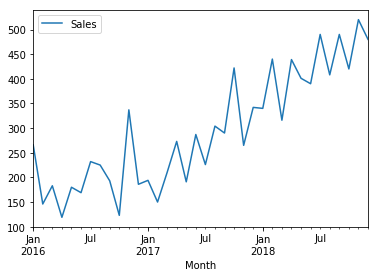

In [12]:
%matplotlib inline
sales.plot()

# Stationary
To have TS as a Stationary, Mean, Variance and Covariance should be constant pver period.
In above graph its not the case.
So have to convert this into Stationary, using difference of a series.

In [14]:
sales_diff = sales.diff(periods = 1) # Integrated of Order 1, denoted as I(1). For ARIMA mode, this is denoted by d (difference)
sales_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [15]:
# Sales with NaN will not be used for prediction, so if required we can remove it
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


In [16]:
from statsmodels.graphics.tsaplots import plot_acf

C:\Users\mayan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


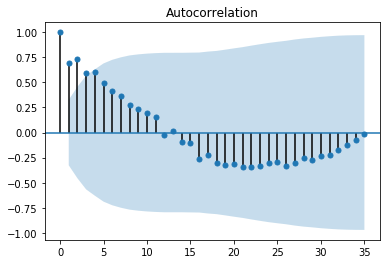

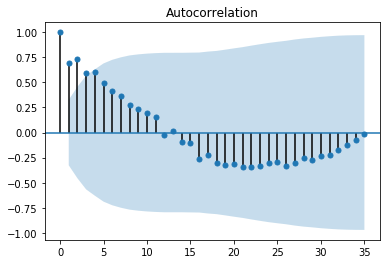

In [17]:
plot_acf(sales)
# Not a stationary as the slope is gradually decreasing.

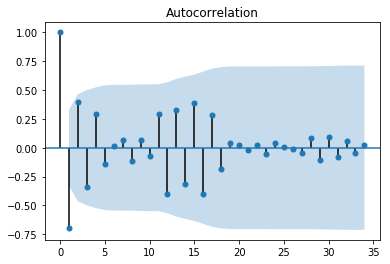

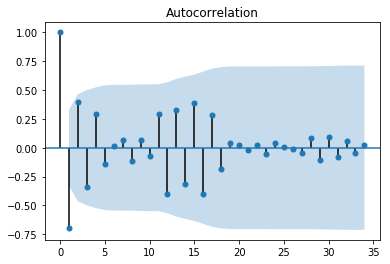

In [18]:
plot_acf(sales_diff)
# Stationary data, as the slope decreased or increased instantly.

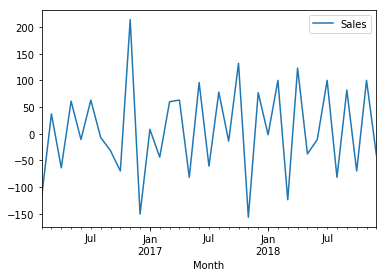

In [19]:
sales_diff.plot()

In [20]:
X = sales.values
X.size

36

In [21]:
train = X[0:27]
test = X[27:]
train.size

27

In [22]:
predictions = []

In [23]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [24]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [26]:
predictions = model_ar_fit.predict(start = 27, end = 36)

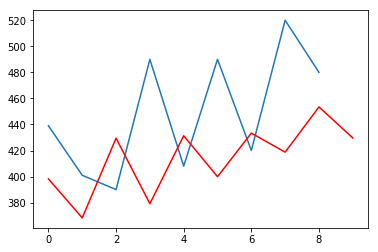

In [27]:
plt.plot(test)
plt.plot(predictions, color = 'red')

# ARIMA Model

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
# Need to pass p, d, q along with the data-set.
# p = periods taken for autoregressive model
# d = Integrated order
# q = periods in moving average model

train = train.astype('float32')
model_arima = ARIMA(train, order = (3,1,0))

In [49]:
model_arima_fit = model_arima.fit(disp = -1)

In [50]:
predictions = model_arima_fit.forecast(steps = 9)
predictions

(array([ 393.12494702,  367.08456761,  432.19173345,  370.18123336,
         424.07808078,  400.33353259,  444.76783578,  412.54161691,
         450.35932864]),
 array([ 56.02220002,  56.21259264,  59.03430423,  59.47996055,
         69.55875727,  70.1495543 ,  73.56196403,  74.42327198,  79.35949382]),
 array([[ 283.32345264,  502.92644139],
        [ 256.90991057,  477.25922466],
        [ 316.48662331,  547.89684359],
        [ 253.60265287,  486.75981384],
        [ 287.74542173,  560.41073984],
        [ 262.84293262,  537.82413255],
        [ 300.58903564,  588.94663592],
        [ 266.67468422,  558.40854959],
        [ 294.81757893,  605.90107835]]))

In [52]:
train.size

27

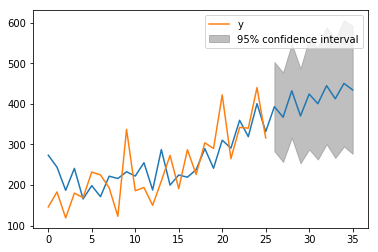

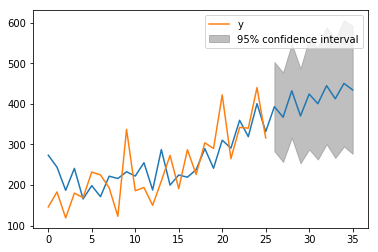

In [53]:
model_arima_fit.plot_predict(1,36)

In [55]:
#plt.plot(test)
#plt.plot(predictions, color = 'red')